In [1]:
#Data analysis of the nutrition facts of items from 5 popular fast food chains. 

#Group Members: Gia Berekashvili, Will Papcke, Hannah Reichensperger, Sam Sanchez

In [2]:
#Import necessary packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

#Import DataFrame, rename columns, convert quantitative data into to numerical values
data = pd.read_csv("FastFoodNutritionMenuV2.csv", header=0)
data.columns = ["Company", "Item", "Calories", "Calories from Fat", "Total Fat(g)", "Saturated Fat(g)", "Trans Fat(g)", "Cholesterol(mg)", "Sodium(mg)", "Carbs(g)", "Fiber(g)", "Sugars(g)", "Protein(g)", "Weight Watchers Points"]
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors='coerce')

#Check for missing values per column
import numpy as np
import pandas as pd
import re

#Import DataFrame, rename columns, convert quantitative data into to numerical values
data = pd.read_csv("FastFoodNutritionMenuV2.csv", header=0)
data.columns = ["Company", "Item", "Calories", "Calories from Fat", "Total Fat(g)", "Saturated Fat(g)", "Trans Fat(g)", "Cholesterol(mg)", "Sodium(mg)", "Carbs(g)", "Fiber(g)", "Sugars(g)", "Protein(g)", "Weight Watchers Points"]
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors='coerce')

#Check for missing values per column
print("Count of NA Values per Column")
print(data.isna().sum(), "\n")

#Calculate calories from fat using total fat(g) columns
calsPerFat=9
data["Calories from Fat"]=data["Total Fat(g)"]*calsPerFat

#Drop columns with missing and unnessesary data
print("Weight Watchers Points will be dropped.\n")
data.drop("Weight Watchers Points",axis=1,inplace=True)

#Recheck for missing values per column
print("New count of NA Values per Column")
print(data.isna().sum(),"\n")

#Check for missing values per Company
dataNA = data.copy()
dataNA[dataNA.columns[1:]] = dataNA[dataNA.columns[1:]].isna()
print("Maximum Count of NA Values per Company")
print(dataNA.groupby("Company").agg("sum").max(axis=1), "\n")

#Drop compan(y/ies) with too many missing values
print("Taco Bell will be dropped.\n")
data = data[data["Company"] != "Taco Bell"]
dataNA=dataNA[dataNA["Company"] != "Taco Bell"]

#Recheck for count of missing values per Company
print("New maximum Count of NA Values per Company")
print(dataNA.groupby("Company").agg("sum").max(axis=1), "\n")

#Drop missing data columns
print("The remaining NA rows will be dropped.")
data = data.dropna()

#Compare shapes to see how much data was dropped
print("Shape of Original Data:", pd.read_csv("FastFoodNutritionMenuV2.csv").shape)
print("Shape of New Data:", data.shape, "\n")

#How many items per company
print("Items per Company")
print(data.groupby("Company")["Item"].count())

#View data
data.head()

Count of NA Values per Column
Company                     0
Item                        0
Calories                   15
Calories from Fat         518
Total Fat(g)               69
Saturated Fat(g)           70
Trans Fat(g)               69
Cholesterol(mg)            29
Sodium(mg)                 16
Carbs(g)                   70
Fiber(g)                   84
Sugars(g)                  30
Protein(g)                 69
Weight Watchers Points    272
dtype: int64 

Weight Watchers Points will be dropped.

New count of NA Values per Column
Company               0
Item                  0
Calories             15
Calories from Fat    69
Total Fat(g)         69
Saturated Fat(g)     70
Trans Fat(g)         69
Cholesterol(mg)      29
Sodium(mg)           16
Carbs(g)             70
Fiber(g)             84
Sugars(g)            30
Protein(g)           69
dtype: int64 

Maximum Count of NA Values per Company
Company
Burger King    11
KFC            10
McDonald’s      2
Pizza Hut       7
Taco Bell     

,Company,Item,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugars(g),Protein(g)
0,McDonald’s,Hamburger,250.0,81.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0
1,McDonald’s,Cheeseburger,300.0,108.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0
2,McDonald’s,Double Cheeseburger,440.0,207.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0
3,McDonald’s,McDouble,390.0,171.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0
4,McDonald’s,Quarter Pounder® with Cheese,510.0,234.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0


In [3]:
#Compute average nutrition per item
companies = data.groupby("Company").groups.keys()

#Create new DataFrame for new data values
nutritionPerItem=pd.DataFrame(index=companies)

#For each category, calculate average nutrition per item for each company
nutritionPerItem["Proportion of Calories from Fat"]=""
for company in companies:
        dataPerCompany = data[data["Company"] == company]
        dataPerCompany = dataPerCompany[dataPerCompany["Calories"] != 0]
        calsPerFat=np.array(dataPerCompany["Calories from Fat"])
        calories = np.array(dataPerCompany["Calories"])
        proportionOfFatCals=calsPerFat/calories
        nutritionPerItem.loc[company,"Proportion of Calories from Fat"]=proportionOfFatCals.mean()
        macros=["Total Fat(g)","Carbs(g)","Protein(g)"]
        for macro in macros:
            columnTitle="Average "+macro
            nutritionPerItem.loc[company,columnTitle]=dataPerCompany[macro].mean()
            
#View nutritionPerItem DataFrame
nutritionPerItem

,Proportion of Calories from Fat,Average Total Fat(g),Average Carbs(g),Average Protein(g)
Burger King,0.353891,17.870482,47.596386,11.686747
KFC,0.236714,8.075581,38.843023,6.104651
McDonald’s,0.274414,10.415335,41.718850,9.814696
Pizza Hut,0.378407,11.477612,28.895522,11.686567
Wendy’s,0.276612,12.882759,46.606897,11.731034


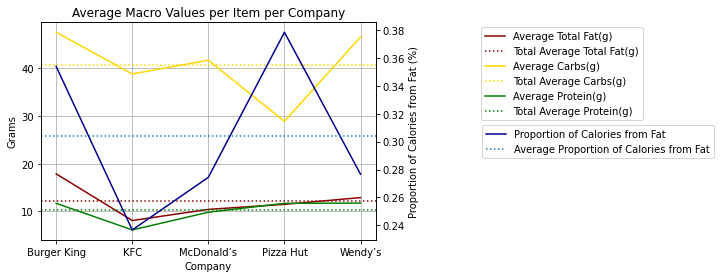

In [4]:
#Graph of average nutrition per item

#Create figure and primary y-axis
fig,ax=plt.subplots()

#Create list of graph color preference
colors=["darkred","gold","green"]

#Plot average macros per item for each company and average of all items from all companies for comparison
for i in np.arange(1,4):
    ax.plot(nutritionPerItem.index,nutritionPerItem.iloc[:,i],color=colors[i-1],label=nutritionPerItem.columns.values[i])
    ax.axhline(y=nutritionPerItem.iloc[:,i].mean(),color=colors[i-1],
               linestyle=":",label="Total "+nutritionPerItem.columns.values[i])

#Add legend with paramter bbox_to_anchor to place legend outside of graph
ax.legend(bbox_to_anchor=(1.3,1))
ax.grid(True)

#Set graph titles and axis labels
ax.set_title("Average Macro Values per Item per Company")
ax.set_xlabel("Company")
ax.set_ylabel("Grams")

#Plot proportion of calories from fat on secondary y-axis
ax2=ax.twinx()
ax2.plot(nutritionPerItem.index,nutritionPerItem.iloc[:,0],label=nutritionPerItem.columns.values[0],color="darkblue")
ax2.axhline(y=nutritionPerItem.iloc[:,0].mean(),label="Average "+nutritionPerItem.columns.values[0],linestyle=":")

#Add legend and set axis labels
ax2.legend(bbox_to_anchor=(2.025,0.55))
ax2.set_ylabel("Proportion of Calories from Fat (%)")
ax2.set_xlabel("Company")
plt.show()

In [5]:
#Compute average nutrition per calorie for each company
companies = data.groupby("Company").groups.keys()

#Create new DataFrame for new data values
nutritionPerCalorie=pd.DataFrame(index=companies)

#For each category, calculate average nutrition per calorie for each company
for category in list(data.columns[4:]):
    print("\nAverage", category, "per Calorie for each Company (Items with 0 calories were dropped)")
    columnTitle="Average "+category+" per Calorie"
    nutritionPerCalorie[columnTitle]=""
    for company in companies:
        dataPerCompany = data[data["Company"] == company]
        dataPerCompany = dataPerCompany[dataPerCompany["Calories"] != 0]
        nutrition = np.array(dataPerCompany[category])
        calories = np.array(dataPerCompany["Calories"])
        nutritionPerCalories = nutrition / calories
        metric = re.search("\(([a-z]+)\)", category).group(1)
        nutritionPerCalorie.loc[company,columnTitle]=nutritionPerCalories.mean()
        print(company + ":", str(round(nutritionPerCalories.mean(), 4)) + metric)
        
#View nutritionPerCalorie DataFrame
nutritionPerCalorie


Average Total Fat(g) per Calorie for each Company (Items with 0 calories were dropped)
Burger King: 0.0393g
KFC: 0.0263g
McDonald’s: 0.0305g
Pizza Hut: 0.042g
Wendy’s: 0.0307g

Average Saturated Fat(g) per Calorie for each Company (Items with 0 calories were dropped)
Burger King: 0.0128g
KFC: 0.0054g
McDonald’s: 0.0136g
Pizza Hut: 0.0171g
Wendy’s: 0.0112g

Average Trans Fat(g) per Calorie for each Company (Items with 0 calories were dropped)
Burger King: 0.0004g
KFC: 0.0g
McDonald’s: 0.0003g
Pizza Hut: 0.0g
Wendy’s: 0.0003g

Average Cholesterol(mg) per Calorie for each Company (Items with 0 calories were dropped)
Burger King: 0.106mg
KFC: 0.087mg
McDonald’s: 0.1084mg
Pizza Hut: 0.0977mg
Wendy’s: 0.1151mg

Average Sodium(mg) per Calorie for each Company (Items with 0 calories were dropped)
Burger King: 1.5742mg
KFC: 3.1136mg
McDonald’s: 1.243mg
Pizza Hut: 1.9969mg
Wendy’s: 1.2586mg

Average Carbs(g) per Calorie for each Company (Items with 0 calories were dropped)
Burger King: 0.1486g


,Average Total Fat(g) per Calorie,Average Saturated Fat(g) per Calorie,Average Trans Fat(g) per Calorie,Average Cholesterol(mg) per Calorie,Average Sodium(mg) per Calorie,Average Carbs(g) per Calorie,Average Fiber(g) per Calorie,Average Sugars(g) per Calorie,Average Protein(g) per Calorie
Burger King,0.039321,0.012812,0.000417,0.106048,1.574201,0.148631,0.003077,0.097964,0.023916
KFC,0.026302,0.005448,0.000031,0.08703,3.113638,0.162736,0.004915,0.126119,0.023408
McDonald’s,0.03049,0.013631,0.000349,0.1084,1.242969,0.155351,0.002995,0.117034,0.033557
Pizza Hut,0.042045,0.01712,0.000017,0.097718,1.996937,0.112204,0.007455,0.00898,0.044364
Wendy’s,0.030735,0.011227,0.000307,0.115085,1.258571,0.15788,0.004981,0.10485,0.027898


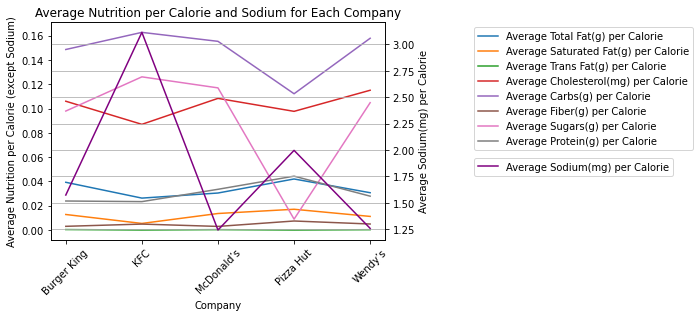

In [6]:
#Graph of average nutrition per calorie

#Create figure and primary y-axis
fig, ax1 = plt.subplots()

#Plot all nutrition categories except "Sodium" on the primary y-axis
for i, category in enumerate(nutritionPerCalorie.columns):
    if "Sodium" not in category:
        ax1.plot(nutritionPerCalorie.index, nutritionPerCalorie[category], label=category)

#Set labels and legend for the primary y-axis
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Nutrition per Calorie (except Sodium)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(bbox_to_anchor=(1.25, 1), loc='upper left')

#Create a secondary y-axis for "Sodium" metric
ax2 = ax1.twinx()

#Plot "Sodium" metric on the secondary y-axis
ax2.plot(nutritionPerCalorie.index, nutritionPerCalorie["Average Sodium(mg) per Calorie"], color='purple', label='Average Sodium(mg) per Calorie')

#Set axis labels and legend for the secondary y-axis
ax2.set_ylabel('Average Sodium(mg) per Calorie')
ax2.legend(bbox_to_anchor=(1.25, 0.4), loc='upper left')

#Set title
plt.title('Average Nutrition per Calorie and Sodium for Each Company')

# Show plot
plt.grid(True)
plt.show()
